In [7]:
from tqdm import tqdm

import gzip
import os

import random


d = "texts" 

In [3]:
import spacy
import spacy
from spacy import displacy
nlp = spacy.load("nl_core_news_lg")

# Define NER Pipeline and Run on Texts

In [3]:
def load(file):
    with open(os.path.join(d, file), "r") as handle:
        return handle.read()
    
def preprocess(text):
    return text


relevant_labels = ["PERSON", "GPE", "ORG"]
def postprocess(doc_obj):
    return [e for e in doc_obj.ents if (e.label_ in relevant_labels) and len(str(e)) > 2]

In [4]:
files = random.sample(os.listdir(d), len(os.listdir(d)))

entity_lists = {}
texts = []
for f in tqdm(files):
    text = load(f)
    texts.append(text)
    entities = postprocess(
                    nlp(
                        preprocess(text)
                        )
                    )   
    
    entity_lists[f] = entities

100%|██████████| 9/9 [00:01<00:00,  5.55it/s]


In [5]:
all_ents = [e for e_ls in entity_lists.values() for e in e_ls]

In [6]:
FIX BELOW LOOKING AT MEDIUM


NameError: name 'd' is not defined

In [5]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

NameError: name 'sentences' is not defined

# Inspect List of Entities and Distribution over it

In [6]:
for e in all_ents:
    print(e, "|\t", e.label_, "\n")

Zuin |	 PERSON 

oeoteg |	 PERSON 

begate |	 GPE 

tetien den der de |	 PERSON 

uiiverseele Erfgenaame |	 PERSON 

Jangst leevende |	 PERSON 

Jan der kurgjk |	 PERSON 

Zovale ven Eerst |	 PERSON 

paoraarde tetfpraen |	 PERSON 

Jangstheerende miptigt |	 PERSON 

prede |	 GPE 

dee
p haan |	 PERSON 

alzo den Eerster |	 PERSON 

namentlijk den langstleerende |	 PERSON 

actien |	 PERSON 

tniverseele |	 GPE 

zijne of |	 PERSON 

deee den |	 PERSON 

daton ed parasten |	 PERSON 

weesen |	 PERSON 

Erfportie |	 GPE 

devolveeren |	 GPE 

onderda |	 GPE 

dese Condetien |	 PERSON 

formee |	 PERSON 

Jnventaris |	 PERSON 

westaan |	 GPE 

dese |	 GPE 

Jrmstianat |	 ORG 

depeondeden |	 PERSON 

WWijders |	 ORG 

mijne natelatene |	 PERSON 

linnes |	 GPE 

suwas silverwerk |	 PERSON 

kleijnodien
 |	 PERSON 

deegens houiers |	 PERSON 

mitsg |	 PERSON 

goude suwase |	 PERSON 

den Jnventaris |	 PERSON 

kleijnovien |	 PERSON 

Michiel
Dirk |	 PERSON 

nederland |	 GPE 

neevens 

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

In [8]:
entity_counts = Counter(all_ents)

ranks, counts = list(zip(*enumerate(c for e, c in entity_counts.most_common())))


for ent, count in entity_counts.most_common(10):
    print(count, ent)

1 Zuin
1 oeoteg
1 begate
1 tetien den der de
1 uiiverseele Erfgenaame
1 Jangst leevende
1 Jan der kurgjk
1 Zovale ven Eerst
1 paoraarde tetfpraen
1 Jangstheerende miptigt


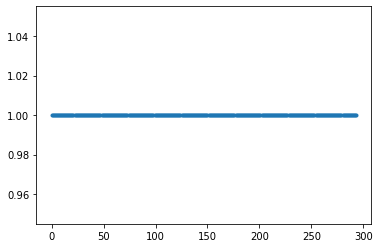

In [9]:
plt.plot(ranks, counts, ".")

# Create Index of Entities 
## i.e. Link Entities into Texts in which they appear

In [10]:
import pandas as pd

records = []

for (filename, entity_list), t in zip(entity_lists.items(), texts):
    for entity in entity_list:
        start, end = max(entity.start_char-10, 0), min(entity.end_char+10, len(t))
        rec = (str(entity), filename, entity.label_, t[start:end]) # , entity.start, entity.end)
        records.append(rec)
        
        
df = pd.DataFrame.from_records(records, columns=["entity_name", "filename", "entity_type", "snippet"])
    
df.to_csv("some_csv.csv")

In [17]:
df[df.entity_type == "PERSON"]

,entity_name,filename,entity_type,snippet
0,Zuin,txt_NL-HaNA_1.04.02_6847_1184.txt,PERSON,heer\naan Zuin Wel Edele
1,oeoteg,txt_NL-HaNA_1.04.02_6847_1184.txt,PERSON,te e pare oeoteg tiende be
3,tetien den der de,txt_NL-HaNA_1.04.02_6847_1184.txt,PERSON,tin\ntaan tetien den der de de este d
4,uiiverseele Erfgenaame,txt_NL-HaNA_1.04.02_6847_1184.txt,PERSON,eenige en uiiverseele Erfgenaame de Jangst
5,Jangst leevende,txt_NL-HaNA_1.04.02_6847_1184.txt,PERSON,enaame de Jangst leevende van ons\nd
...,...,...,...,...
288,Cornelis Senff,txt_NL-HaNA_1.04.02_6847_0134.txt,PERSON,aris\nwijk Cornelis Senff de Erfgen
290,desen mitsg,txt_NL-HaNA_1.04.02_6847_0134.txt,PERSON,enaame in desen mitsg:s tot\nmed
291,besorger der begraaffenisse,txt_NL-HaNA_1.04.02_6847_0134.txt,PERSON,tot\nmede besorger der begraaffenisse zijn wel
292,Heer M,txt_NL-HaNA_1.04.02_6847_0134.txt,PERSON,E: Agtb: Heer M:r Fredrik


In [ ]:
df[df.entity_type == "PERSON"].to_csv("person_csv.csv")

In [12]:
occurred_together = [(e1, e2) for e_ls in entity_lists.values() for e1 in e_ls for e2 in e_ls if not e1 == e2]
occurred_together = random.sample(occurred_together, 50)

In [13]:
import networkx as nx

G = nx.Graph()
G.add_edges_from(occurred_together)

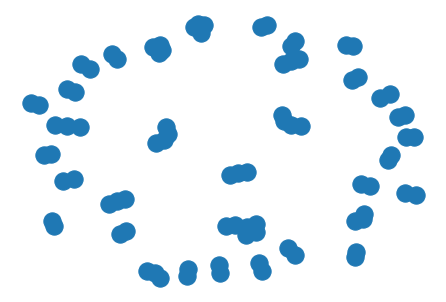

In [14]:
nx.draw(G); plt.show()

# Things to DO

 - get distribution over entities
 - create actual index as CSV table
 - create basic knowledge graph 

---
## Use Jaccard Distance (Intersection over Union)

Compute overlap of all pairs of texts (in terms of Jaccard distance) and then establish the distribution over these overlaps. Could use that to identify texts that appear because the same physical page was scanned twice.

In [33]:
def jaccard(words1, words2):
    s1, s2 = set(words1), set(words2)
    return len(s1 & s2)/len(s1 | s2)


texts = {f: load(f) for f in files}


all_distances = []
for f1, t1 in texts.items():
    for f2, t2 in texts.items():
        d = jaccard(t1, t2)
        all_distances.append(d)
        print(f1, f2, d)


txt_NL-HaNA_1.04.02_6847_0013.txt txt_NL-HaNA_1.04.02_6847_0013.txt 1.0
txt_NL-HaNA_1.04.02_6847_0013.txt txt_NL-HaNA_1.04.02_6847_0012.txt 0.11475409836065574
txt_NL-HaNA_1.04.02_6847_0013.txt txt_NL-HaNA_1.04.02_6847_0011.txt 0.967741935483871
txt_NL-HaNA_1.04.02_6847_0012.txt txt_NL-HaNA_1.04.02_6847_0013.txt 0.11475409836065574
txt_NL-HaNA_1.04.02_6847_0012.txt txt_NL-HaNA_1.04.02_6847_0012.txt 1.0
txt_NL-HaNA_1.04.02_6847_0012.txt txt_NL-HaNA_1.04.02_6847_0011.txt 0.11475409836065574
txt_NL-HaNA_1.04.02_6847_0011.txt txt_NL-HaNA_1.04.02_6847_0013.txt 0.967741935483871
txt_NL-HaNA_1.04.02_6847_0011.txt txt_NL-HaNA_1.04.02_6847_0012.txt 0.11475409836065574
txt_NL-HaNA_1.04.02_6847_0011.txt txt_NL-HaNA_1.04.02_6847_0011.txt 1.0
